In [ ]:
# import mods/pkgs
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
import pandas as pd 

In [ ]:
# define functions for the ode and the analytical solution: 
# dv/dx : 
from scipy import constants

def velocity_analytical(x,x0,v0): 
  g0 = constants.g # m/s^2 : acceleration of gravity at surface
  R = 6.37e6  # Earth's Radius
  v = np.zeros(x.shape[0])
  # function for gravity
  def g(x):
    return (g0 * R**2)/(R + x)
  # loop through positions
  for i in range(x.shape[0]): 
    # intial values
    if i == 0: 
      x[i] = x0
      v[i] = v0
      vv,gg = np.nan,np.nan
    else: 
      vv = v0**2 + 2*g(x[i]) - 2*g0*R
      v[i] = +np.sqrt(vv)     
  return v


         pos  v_analytical
0        0.0   1500.000000
1    10000.0   1433.239135
2    20000.0   1363.437476
3    30000.0   1290.100430
4    40000.0   1212.585533
5    50000.0   1130.032114
6    60000.0   1041.241090
7    70000.0    944.453367
8    80000.0    836.897400
9    90000.0    713.719502
10  100000.0    564.786880


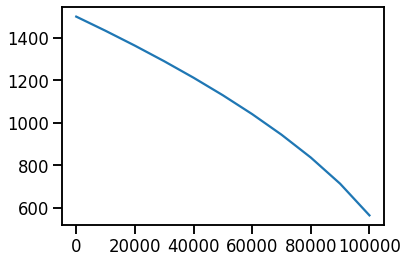

In [ ]:
# Check analytical solution: 
x_init, x_fin = 0, 100000. # inital and final positions (meters) 
h = 10000 # stepsize (meters) 
x = np.arange(x_init,x_fin+h,h)

v = velocity_analytical(x,0,1500)
data = pd.DataFrame(np.column_stack((x,v)),columns=['pos','v_analytical'])

print(data)
plt.plot(data.pos,data.v_analytical); plt.tight_layout() # quick plot for visual check 


In [ ]:
# Numerical approach

# Build function for Euler's method integration: 
def integrate_euler(F,y0,x0,xStop,h):
  x = np.arange(x0,xStop + h,h) 
  y = np.zeros(x.shape[0])
  for i in range(x.shape[0]): 
    if i == 0: 
      y[0] = y0
    elif i > 0: 
      y[i] = y[i-1] +F(x[i-1],y[i-1]) * h
  data = np.column_stack((x,y))
  return data

def dvdx(x,v):
  g0 = constants.g
  R = 6.37e6
  def g(x): 
    return -(g0 * R**2)/(R + x)**2
  return g(x)/v

v_init = 1500.  # m/s
x_init = 0      # m
x_final = 1e5
h = 1e4         # stepsize

res = integrate_euler(dvdx,v_init,x_init,x_final,h)
data['v_numerical'] = res[:,1]  # add column to exisiting dataframe
print(data)


         pos  v_analytical  v_numerical
0        0.0   1500.000000  1500.000000
1    10000.0   1433.239135  1434.622333
2    20000.0   1363.437476  1366.479436
3    30000.0   1290.100430  1295.162164
4    40000.0   1212.585533  1220.152807
5    50000.0   1130.032114  1140.780453
6    60000.0   1041.241090  1056.149854
7    70000.0    944.453367   965.021810
8    80000.0    836.897400   865.597937
9    90000.0    713.719502   755.097525
10  100000.0    564.786880   628.818431


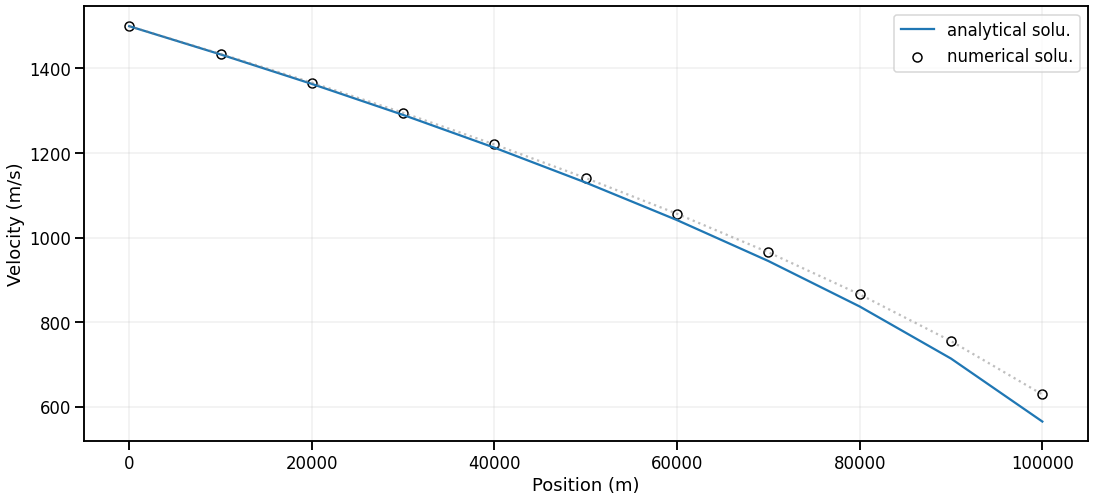

In [ ]:
# plot figure: 
sb.set_context('talk') # makes the figure labels, text, etc. bigger
fig,ax = plt.subplots(1,1,figsize=(18,8))
ax.plot(data.pos,data.v_analytical,label='analytical solu.')
ax.plot(data.pos,data.v_numerical,alpha=0.5,c='grey',ls=':')
ax.scatter(data.pos,data.v_numerical,ec='k',fc='w',label='numerical solu.')
ax.set_xlabel('Position (m)')
ax.set_ylabel('Velocity (m/s)')
ax.grid(True,alpha=.2)
ax.legend()